In [1]:
!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

--2020-07-01 11:42:35--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-07-01 11:42:35 (48.4 MB/s) - ‘helper.py’ saved [2813/2813]



In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


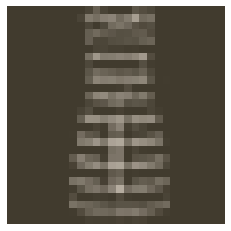

In [3]:


image, label = next(iter(trainloader))
helper.imshow(image[0,:]);



In [5]:
image.shape

torch.Size([64, 1, 28, 28])

In [6]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

In [7]:
class Fashion(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden1 = nn.Linear(784,256)
    self.hidden2 = nn.Linear(256,128)
    self.hidden3 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
  def forward(self,x):
    x = x.view(x.shape[0], -1)
    x = F.relu(self.hidden1(x))
    x = F.relu(self.hidden2(x))
    x = F.relu(self.hidden3(x))
    x= F.log_softmax(self.output(x),dim=1)
    return x 

In [9]:
model = Fashion()
loss = nn.NLLLoss()
optimi = optim.SGD(model.parameters(),lr=0.01)

In [12]:
epochs = 5
for i in range(epochs):
  run_loss=0
  for images,labels in trainloader:
    log = model(images)
    los = loss(log,labels)
    optimi.zero_grad()
    los.backward()
    optimi.step()
    run_loss+= los.item()
  else:
    print(f"Training loss: {run_loss/len(trainloader)}")

Training loss: 0.5966859787766104
Training loss: 0.5076881453140712
Training loss: 0.4662771718238971
Training loss: 0.43862497774776876
Training loss: 0.41727653923414665


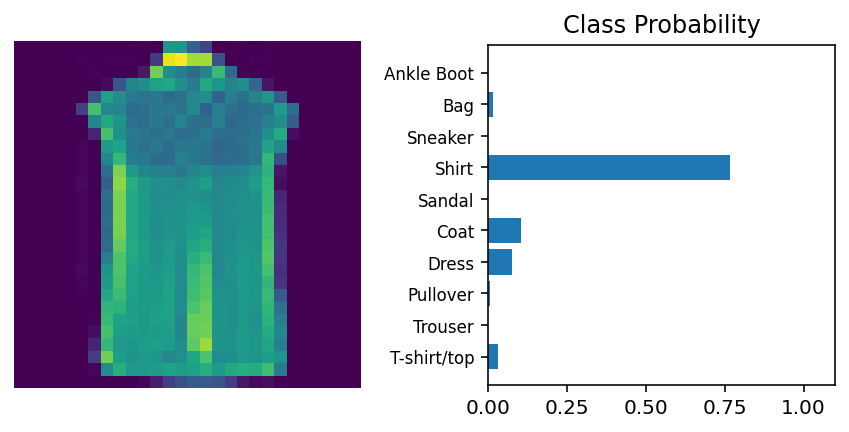

In [14]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper


dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[3]

ps = torch.exp(model(img))

helper.view_classify(img, ps, version='Fashion')